# EJERCICIOS

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization,Normalization
from keras.initializers import HeNormal
from keras.activations import swish

In [17]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [19]:
# Fusionar todos los datos para dividir posteriormente
x_total = np.concatenate((x_train, x_test))
y_total = np.concatenate((y_train, y_test))

# Dividir el conjunto completo en 50,000 para entrenamiento y 10,000 para validación + test
x_train, x_temp, y_train, y_temp = train_test_split(x_total, y_total, test_size=10000, random_state=42)

# Dividir los 10,000 restantes en 5,000 para validación y 5,000 para test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=5000, random_state=42)

# Imprimir las formas resultantes
print("Forma de x_train:", x_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de x_test:", x_test.shape)

Forma de x_train: (50000, 32, 32, 3)
Forma de x_val: (5000, 32, 32, 3)
Forma de x_test: (5000, 32, 32, 3)


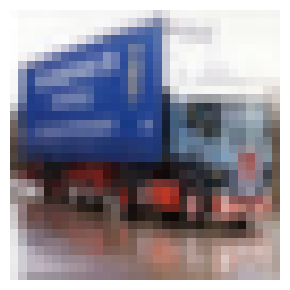

In [6]:
plt.figure(figsize=(3, 3))
plt.imshow(x_train[0])
plt.axis('off')
plt.tight_layout()
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model = Sequential()
model.add(Input(shape=(32, 32,3)))
model.add(Flatten())
for _ in range(20):
    model.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model.add(Dense(10, activation="softmax"))
    




### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [25]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
models=[]
histories=[]


    
i=0
for lr in learning_rates:
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    models.append({'LR':lr,
                   'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                   'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                   'Tiempo Total(s)':training_time
                   })


Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 6.5239 - sparse_categorical_accuracy: 0.1559 - val_loss: 2.0145 - val_sparse_categorical_accuracy: 0.2576
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0094 - sparse_categorical_accuracy: 0.2621 - val_loss: 1.9230 - val_sparse_categorical_accuracy: 0.2964
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8780 - sparse_categorical_accuracy: 0.3146 - val_loss: 1.8521 - val_sparse_categorical_accuracy: 0.3250
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8019 - sparse_categorical_accuracy: 0.3426 - val_loss: 1.8203 - val_sparse_categorical_accuracy: 0.3374
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7532 - sparse_categorical_accuracy: 0.3628 - val_loss: 1.7506 - val_sparse_categorical_accuracy: 0.3662
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7087 - sparse_categorical_accuracy: 0.3770 - val_loss: 1.7218 - val_sparse_categorical_accuracy:

In [23]:
for model in models:
    print(f"Tasa de aprendizaje: {model['LR']}")
    print(f"Precisión en entrenamiento: {model['sparse categorical accuracy training']}")
    print(f"Precisión en validación: {model['sparse categorical accuracy validation']}")
    print(f"Tiempo de Ejecucuón: {model['Tiempo Total(s)']}")
    print("-------------------------------------------------")

Tasa de aprendizaje: 0.0001
Precisión en entrenamiento: 0.5399199724197388
Precisión en validación: 0.4553999900817871
Tiempo de Ejecucuón: 75.78635573387146
-------------------------------------------------
Tasa de aprendizaje: 0.0007
Precisión en entrenamiento: 0.4842199981212616
Precisión en validación: 0.4659999907016754
Tiempo de Ejecucuón: 75.38987731933594
-------------------------------------------------
Tasa de aprendizaje: 0.001
Precisión en entrenamiento: 0.48420000076293945
Precisión en validación: 0.46219998598098755
Tiempo de Ejecucuón: 76.89889359474182
-------------------------------------------------
Tasa de aprendizaje: 0.005
Precisión en entrenamiento: 0.09956000000238419
Precisión en validación: 0.09640000015497208
Tiempo de Ejecucuón: 76.77775597572327
-------------------------------------------------


### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.